# nn module

poly model

In [17]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
weights_1 = [linear_layer.bias.item(), linear_layer.weight[:, 0].item(), linear_layer.weight[:, 1].item(), linear_layer.weight[:, 2].item()]

99 215.71444702148438
199 151.7291259765625
299 107.63551330566406
399 77.21635437011719
499 56.20832824707031
599 41.68463897705078
699 31.6335506439209
799 24.670724868774414
899 19.84253692626953
999 16.49140167236328
1099 14.163272857666016
1199 12.544445991516113
1299 11.417806625366211
1399 10.63306713104248
1499 10.086023330688477
1599 9.70438003540039
1699 9.437936782836914
1799 9.25178050994873
1899 9.121633529663086
1999 9.03057861328125
Result: y = -0.014368983916938305 + 0.8514941930770874 x + 0.002478888491168618 x^2 + -0.09258409589529037 x^3


In [18]:

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
weights_2 = [linear_layer.bias.item(), linear_layer.weight[:, 0].item(), linear_layer.weight[:, 1].item(), linear_layer.weight[:, 2].item()]

99 1388.34521484375
199 511.0331115722656
299 426.5309143066406
399 369.560546875
499 303.4996337890625
599 232.50360107421875
699 165.45448303222656
799 109.13275909423828
899 66.31185150146484
999 37.027591705322266
1099 19.718177795410156
1199 11.91584587097168
1299 9.203681945800781
1399 8.994197845458984
1499 8.967279434204102
1599 8.880658149719238
1699 8.871264457702637
1799 8.903987884521484
1899 8.923483848571777
1999 8.906770706176758
Result: y = 2.913600916087944e-09 + 0.8562479019165039 x + -5.1790802757523124e-09 x^2 + -0.09382589906454086 x^3


In [19]:


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

print(f'Result: {model.string()}')
weights_3 = [model.a.item(), model.b.item(), model.c.item(), model.d.item()]

99 648.9226684570312
199 458.3493957519531
299 324.6580505371094
399 230.82070922851562
499 164.92514038085938
599 118.63050842285156
699 86.09256744384766
799 63.21410369873047
899 47.121402740478516
999 35.79767608642578
1099 27.826961517333984
1199 22.214599609375
1299 18.261594772338867
1399 15.47653865814209
1499 13.513819694519043
1599 12.130265235900879
1699 11.154749870300293
1799 10.466777801513672
1899 9.981486320495605
1999 9.639097213745117
Result: y = 0.029813170433044434 + 0.8619412183761597 x + -0.005143267102539539 x^2 + -0.09407009929418564 x^3


In [20]:
# -*- coding: utf-8 -*-
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

print(f'Result: {model.string()}')
weights_4 = [model.a.item(), model.b.item(), model.c.item(), model.d.item(), model.e.item()]

1999 671.5621337890625
3999 332.1305847167969
5999 167.70367431640625
7999 85.73323059082031
9999 55.057552337646484
11999 27.72780418395996
13999 18.226390838623047
15999 13.46341609954834
17999 11.069416046142578
19999 10.137578010559082
21999 9.375433921813965
23999 9.11832046508789
25999 8.783113479614258
27999 8.930070877075195
29999 8.676254272460938
Result: y = -0.005569427739828825 + 0.8561539649963379 x + 0.0005015339702367783 x^2 + -0.0933622196316719 x^3 + 8.931654156185687e-05 x^4 ? + 8.931654156185687e-05 x^5 ?


Result1: y = -0.014368983916938305 + 0.8514941930770874 x + 0.002478888491168618 x^2 + -0.09258409589529037 x^3
Result2: y = 2.913600916087944e-09 + 0.8562479019165039 x + -5.1790802757523124e-09 x^2 + -0.09382589906454086 x^3
Result3: y = 0.029813170433044434 + 0.8619412183761597 x + -0.005143267102539539 x^2 + -0.09407009929418564 x^3
Result4: y = -0.005569427739828825 + 0.8561539649963379 x + 0.0005015339702367783 x^2 + -0.0933622196316719 x^3 + 8.931654156185687e-05 x^4 ? + 8.931654156185687e-05 x^5 ?


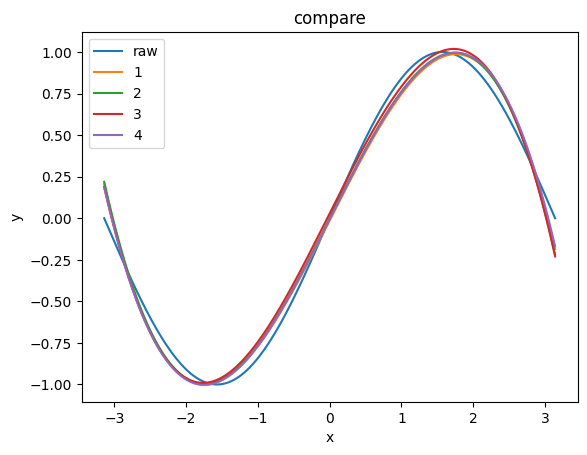

In [22]:
import numpy as np
import matplotlib.pyplot as plt

print(f'Result1: y = {weights_1[0]} + {weights_1[1]} x + {weights_1[2]} x^2 + {weights_1[3]} x^3')
print(f'Result2: y = {weights_2[0]} + {weights_2[1]} x + {weights_2[2]} x^2 + {weights_2[3]} x^3')
print(f'Result3: y = {weights_3[0]} + {weights_3[1]} x + {weights_3[2]} x^2 + {weights_3[3]} x^3')
print(f'Result4: y = {weights_4[0]} + {weights_4[1]} x + {weights_4[2]} x^2 + {weights_4[3]} x^3 + {weights_4[4]} x^4 ? + {weights_4[4]} x^5 ?')
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)
y_1 = weights_1[0] + weights_1[1]*x + weights_1[2]*x**2 + weights_1[3]*x**3
y_2 = weights_2[0] + weights_2[1]*x + weights_2[2]*x**2 + weights_2[3]*x**3
y_3 = weights_3[0] + weights_3[1]*x + weights_3[2]*x**2 + weights_3[3]*x**3
y_4 = weights_4[0] + weights_4[1]*x + weights_4[2]*x**2 + weights_4[3]*x**3 + weights_4[4]*x**4 + weights_4[4]*x**5
plt.plot(x,y,label='raw')
plt.plot(x,y_1,label='1')
plt.plot(x,y_2,label='2')
plt.plot(x,y_3,label='3')
plt.plot(x,y_4,label='4')
plt.title('compare')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()